In [ ]:
import numpy as np 
import pandas as pd 
import os
import cv2
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import multilabel_confusion_matrix
import tensorflow as tf

**Mount Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Labels**

In [ ]:
labels = os.listdir("drive/MyDrive/Driver_drowsiness_dataset/train")
labels

['non_sleeping', 'nodding', 'yawning', 'sleepy']

**Visualize Sleep Image**

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(plt.imread("drive/MyDrive/Driver_drowsiness_dataset/train/sleepy/_0.jpg"))

FileNotFoundError: ignored

**Image Array**

In [ ]:
a = plt.imread("drive/MyDrive/Driver_drowsiness_dataset/train/yawning/10.jpg")

In [ ]:
a.shape

**Visualize Yawn**

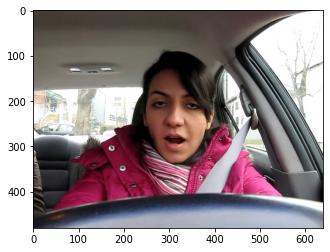

In [ ]:
plt.imshow(plt.imread("drive/MyDrive/Driver_drowsiness_dataset/train/yawning/10.jpg"))

**For yawning and Nodding**

In [ ]:
def face_for_yawn(direc="drive/MyDrive/Driver_drowsiness_dataset/train", face_cas_path="drive/MyDrive/Driver_drowsiness_prediction/prediction-images/haarcascade_frontalface_default.xml"):
    yaw_no = []
    IMG_SIZE = 145
    categories = ["yawning", "nodding"]
    for category in categories:
        path_link = os.path.join(direc, category)
        class_num1 = categories.index(category)
        print(class_num1)
        for image in os.listdir(path_link):
            image_array = cv2.imread(os.path.join(path_link, image), cv2.IMREAD_COLOR)
            face_cascade = cv2.CascadeClassifier(face_cas_path)
            faces = face_cascade.detectMultiScale(image_array, 1.3, 5)
            for (x, y, w, h) in faces:
                img = cv2.rectangle(image_array, (x, y), (x+w, y+h), (0, 255, 0), 2)
                roi_color = img[y:y+h, x:x+w]
                resized_array = cv2.resize(roi_color, (IMG_SIZE, IMG_SIZE))
                yaw_no.append([resized_array, class_num1])
    return yaw_no

In [ ]:
yawn_no_yawn = face_for_yawn()

0
1


**For Sleep and Non-sleep**

In [ ]:

def get_data(dir_path="drive/MyDrive/Driver_drowsiness_dataset/train", face_cas="drive/MyDrive/Driver_drowsiness_prediction/prediction-images/haarcascade_frontalface_default.xml"):
    labels = ['sleepy', 'non_sleeping']
    IMG_SIZE = 145
    data = []
    for label in labels:
        path = os.path.join(dir_path, label)
        class_num = labels.index(label)
        class_num +=2
        print(class_num)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                data.append([resized_array, class_num])
            except Exception as e:
                print(e)
    return data

In [ ]:
data_train = get_data()

2
3


**Extend Data and Convert to array**

In [ ]:
def append_data():
#     total_data = []
    yaw_no = face_for_yawn()
    data = get_data()
    yaw_no.extend(data)
    return np.array(yaw_no)

**New Variable to Store**

In [ ]:
new_data = append_data()

0
1
2
3


<ipython-input-12-be15ac3ad549>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(yaw_no)


**Separate Labels and Features**

In [ ]:
X = []
y = []
for feature, label in new_data:
    X.append(feature)
    y.append(label)

In [ ]:
y             #0,1,2,3  as [1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,


**Reshape Array**

In [ ]:
X = np.array(X)
X = X.reshape(-1, 145, 145, 3)

**Label Binarizer**

In [ ]:
from sklearn.preprocessing import LabelBinarizer
label_bin = LabelBinarizer()
y = label_bin.fit_transform(y)

**LABEL ARRAY**

In [ ]:
y = np.array(y)

**Train AND TEST DATA SPLIT**

In [ ]:
from sklearn.model_selection import train_test_split
seed = 42
test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed, test_size=test_size)

**Length of X test**

In [ ]:
len(X_test)

578

**Data Augmentation**

In [ ]:
train_generator = ImageDataGenerator(rescale=1/255, zoom_range=0.2, horizontal_flip=True, rotation_range=30)
test_generator = ImageDataGenerator(rescale=1/255)

train_generator = train_generator.flow(np.array(X_train), y_train, shuffle=False)
test_generator = test_generator.flow(np.array(X_test), y_test, shuffle=False)

**Model**

In [ ]:
model = Sequential()

model.add(Conv2D(256, (3, 3), activation="relu", input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(64, activation="relu"))
model.add(Dense(4, activation="softmax"))

model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 143, 143, 256)     7168      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 71, 71, 256)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 69, 69, 128)       295040    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 34, 34, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        73792     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 64)       0

In [ ]:
history = model.fit(train_generator, epochs=25, validation_data=test_generator, shuffle=True, validation_steps=len(test_generator))

Epoch 1/25
43/43 [==============================] - 528s 12s/step - loss: 1.0218 - accuracy: 0.5605 - val_loss: 0.4792 - val_accuracy: 0.8010
Epoch 2/25
43/43 [==============================] - 523s 12s/step - loss: 0.4376 - accuracy: 0.7996 - val_loss: 0.3374 - val_accuracy: 0.8547
Epoch 3/25
43/43 [==============================] - 526s 12s/step - loss: 0.3811 - accuracy: 0.8389 - val_loss: 0.2757 - val_accuracy: 0.9031
Epoch 4/25
43/43 [==============================] - 517s 12s/step - loss: 0.3477 - accuracy: 0.8463 - val_loss: 0.2255 - val_accuracy: 0.9135
Epoch 5/25
43/43 [==============================] - 518s 12s/step - loss: 0.3136 - accuracy: 0.8701 - val_loss: 0.2805 - val_accuracy: 0.9135
Epoch 6/25
43/43 [==============================] - 516s 12s/step - loss: 0.2847 - accuracy: 0.8820 - val_loss: 0.2781 - val_accuracy: 0.8754
Epoch 7/25
43/43 [==============================] - 484s 11s/step - loss: 0.2827 - accuracy: 0.8849 - val_loss: 0.1832 - val_accuracy: 0.9239
Epoch 

**History**

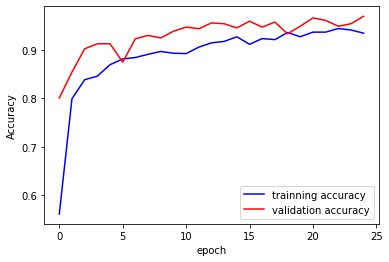

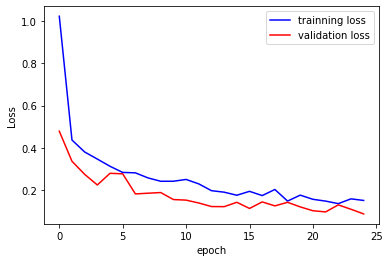

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, "b", label="trainning accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.legend()
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.show()

plt.plot(epochs, loss, "b", label="trainning loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.legend()
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.show()

**Save Model**

In [ ]:
model.save("drowiness_new6.h5")
model.save("drowiness_new6.model")

**Prediction**

In [ ]:
y_predicted = model.predict(X_test)

19/19 [==============================] - 51s 3s/step


In [ ]:
len(y_predicted)

578

In [ ]:
len(X_test)

578

In [ ]:
len(y_test)

578

In [ ]:
y_test

array([[0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       ...,
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 0, 1, 0]])

**Classification Report**

In [ ]:
y_true=np.argmax(y_test, axis=1)

In [ ]:
y_true

array([3, 3, 2, 3, 1, 3, 3, 2, 1, 2, 3, 3, 3, 2, 2, 2, 3, 0, 0, 3, 3, 3,
       2, 1, 1, 2, 2, 2, 3, 2, 3, 2, 3, 2, 0, 3, 3, 2, 1, 3, 3, 3, 2, 3,
       2, 2, 3, 3, 2, 3, 3, 1, 2, 1, 3, 3, 2, 2, 2, 0, 3, 3, 1, 2, 2, 3,
       2, 3, 2, 2, 1, 3, 3, 3, 2, 0, 0, 3, 1, 3, 2, 0, 3, 2, 2, 2, 2, 0,
       3, 3, 2, 3, 3, 3, 1, 0, 3, 0, 3, 3, 3, 1, 3, 1, 2, 3, 2, 1, 2, 2,
       1, 1, 2, 1, 0, 3, 3, 3, 2, 2, 3, 3, 3, 1, 1, 2, 3, 3, 2, 0, 3, 3,
       1, 3, 1, 2, 3, 3, 2, 1, 2, 2, 2, 1, 3, 3, 3, 3, 2, 0, 3, 3, 3, 3,
       3, 0, 1, 0, 3, 1, 3, 2, 2, 3, 2, 3, 3, 2, 3, 2, 3, 1, 2, 0, 3, 3,
       2, 2, 0, 2, 3, 0, 2, 1, 3, 2, 3, 1, 2, 0, 1, 3, 2, 2, 3, 3, 3, 0,
       3, 2, 3, 0, 2, 0, 0, 1, 2, 3, 2, 0, 3, 1, 2, 2, 2, 2, 1, 3, 1, 1,
       1, 0, 2, 3, 3, 3, 3, 0, 1, 2, 0, 0, 3, 3, 1, 3, 3, 0, 3, 3, 0, 0,
       0, 0, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 2, 0, 2, 2, 2, 0, 3, 3, 2, 2,
       3, 2, 2, 0, 2, 3, 2, 2, 2, 3, 3, 3, 3, 3, 0, 1, 0, 3, 3, 3, 3, 2,
       2, 1, 2, 2, 2, 3, 2, 0, 2, 2, 1, 3, 2, 3, 1,

In [ ]:
 np.argmax(y_predicted,axis=1)

array([3, 3, 2, 3, 1, 3, 3, 2, 1, 2, 3, 3, 3, 2, 2, 2, 3, 1, 1, 3, 3, 3,
       2, 1, 1, 2, 2, 2, 3, 2, 3, 2, 3, 2, 1, 3, 3, 2, 1, 2, 3, 3, 2, 3,
       2, 2, 3, 3, 2, 3, 3, 1, 2, 1, 3, 3, 2, 2, 2, 0, 3, 3, 1, 2, 2, 3,
       2, 3, 2, 2, 1, 3, 3, 3, 2, 0, 1, 3, 1, 3, 2, 0, 3, 2, 2, 2, 2, 0,
       3, 3, 2, 3, 3, 3, 1, 0, 3, 0, 3, 3, 3, 1, 3, 1, 2, 3, 2, 1, 2, 2,
       1, 1, 2, 1, 0, 3, 3, 3, 2, 2, 3, 3, 3, 1, 1, 2, 3, 3, 2, 0, 3, 3,
       1, 3, 1, 2, 3, 3, 2, 1, 2, 2, 2, 1, 2, 3, 3, 3, 2, 0, 3, 3, 3, 3,
       3, 0, 1, 0, 3, 1, 3, 2, 2, 3, 2, 3, 3, 2, 3, 2, 3, 1, 2, 0, 3, 3,
       2, 2, 0, 2, 2, 0, 2, 1, 3, 2, 3, 1, 2, 0, 1, 2, 2, 2, 3, 3, 3, 0,
       3, 2, 3, 0, 2, 0, 0, 1, 2, 3, 2, 1, 3, 1, 2, 2, 2, 2, 1, 3, 1, 1,
       1, 0, 2, 3, 3, 3, 3, 0, 1, 2, 1, 0, 3, 3, 1, 3, 3, 1, 3, 3, 1, 1,
       0, 0, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 2, 0, 2, 2, 2, 1, 3, 3, 2, 2,
       3, 2, 2, 0, 2, 3, 2, 2, 2, 3, 3, 3, 3, 3, 0, 1, 0, 3, 3, 3, 3, 2,
       2, 0, 2, 2, 2, 3, 2, 0, 2, 2, 1, 3, 2, 3, 1,

**Classification Report**

In [ ]:
# labels_new = ['non_sleeping', 'nodding', 'yawning', 'sleepy']
labels_new = ['yawning', 'nodding','sleepy','non_sleeping' ]                                
from sklearn.metrics import classification_report
print(classification_report(y_true, np.argmax(y_predicted,axis=1), target_names=labels_new)) #Both should be of same form

              precision    recall  f1-score   support

     yawning       0.98      0.70      0.81        63
     nodding       0.79      0.99      0.88        74
      sleepy       0.98      1.00      0.99       215
non_sleeping       1.00      0.98      0.99       226

    accuracy                           0.96       578
   macro avg       0.94      0.92      0.92       578
weighted avg       0.96      0.96      0.96       578



**Confusion Matrix**

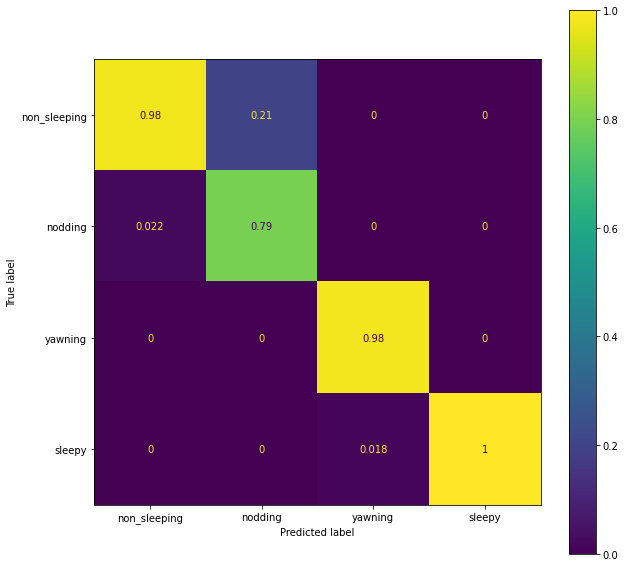

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
#Create confusion matrix and normalizes it over predicted (columns)

result1 = confusion_matrix(y_true,np.argmax(y_predicted,axis=1) , normalize='pred')
result = ConfusionMatrixDisplay(confusion_matrix=result1, display_labels=labels)
fig, ax = plt.subplots(figsize=(10,10))
result.plot(ax=ax)

**Prediction**

In [ ]:
labels_new = ['yawning', 'nodding','sleepy','non_sleeping' ]
IMG_SIZE = 145
def prepare(filepath, face_cas="drive/MyDrive/Driver_drowsiness_prediction/prediction-images/haarcascade_frontalface_default.xml"):
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)
    img_array = img_array / 255
    resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return resized_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)

model = tf.keras.models.load_model("./drowiness_new6.h5")

0- yawning
1- nodding
2- sleepy
3- non_sleeping


1/1 [==============================] - 0s 403ms/step
2
2


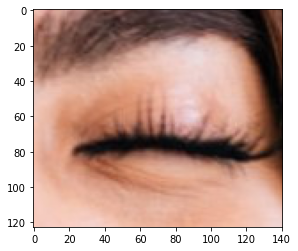

In [ ]:
plt.imshow(plt.imread("drive/MyDrive/Driver_drowsiness_dataset/train/sleepy/_101.jpg"))
prediction = model.predict([prepare("drive/MyDrive/Driver_drowsiness_dataset/train/sleepy/_101.jpg")])
print(np.argmax(prediction))
print(np.argmax(prediction))

1/1 [==============================] - 0s 178ms/step


3

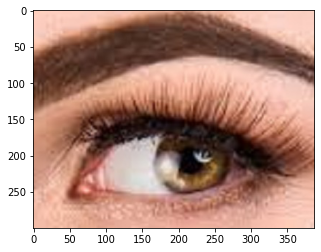

In [ ]:
plt.imshow(plt.imread("drive/MyDrive/Driver_drowsiness_dataset/train/non_sleeping/_104.jpg"))
prediction = model.predict([prepare("drive/MyDrive/Driver_drowsiness_dataset/train/non_sleeping/_104.jpg")])
np.argmax(prediction)

# **Final**

In [ ]:
prediction[0]
# ['yawning', 'nodding','sleepy','non_sleeping' ]
#check sleep value greater than 0.24

array([5.0170562e-12, 2.4317942e-11, 9.9995542e-01, 4.4601336e-05],
      dtype=float32)

1/1 [==============================] - 0s 95ms/step
Driver is sleeping


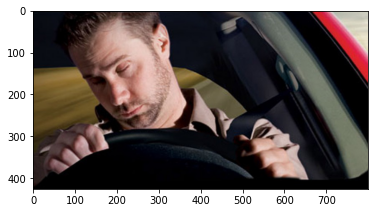

In [ ]:
plt.imshow(plt.imread("drowsydriving.jpg"))
prediction = model.predict([prepare("drowsydriving.jpg")])
if (prediction[0][2]>0.24):
  print("Driver is sleeping")
else:
  print("Drive is not sleeping")

**Extra**

In [ ]:
labels_new = ['yawning', 'nodding','sleepy','non_sleeping' ]
IMG_SIZE = 145
def prepare(filepath, face_cas="drive/MyDrive/Driver_drowsiness_prediction/prediction-images/haarcascade_frontalface_default.xml"):
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)
    img_array = img_array / 255
    resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return resized_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)

model1 = tf.keras.models.load_model("./drowiness_new6.h5")

1/1 [==============================] - 0s 183ms/step
Driver is sleeping ---- value 0.99813


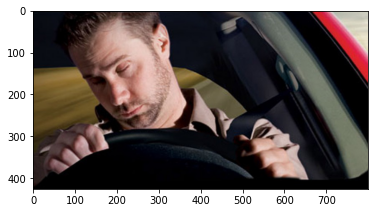

In [ ]:
plt.imshow(plt.imread("drowsydriving.jpg"))
prediction = model1.predict([prepare("drowsydriving.jpg")])
if (prediction[0][2]>0.24):
  print("Driver is sleeping ---- value "+ str(prediction[0][2]))
else:
  print("Drive is not sleeping")

1/1 [==============================] - 0s 114ms/step


3

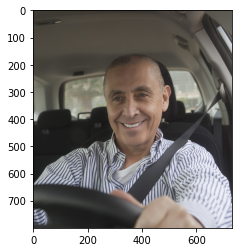

In [ ]:
plt.imshow(plt.imread("driver.jpg"))
prediction = model1.predict([prepare("driver.jpg")])
np.argmax(prediction)

1/1 [==============================] - 0s 108ms/step
Driver is sleeping ---- value 0.99819344


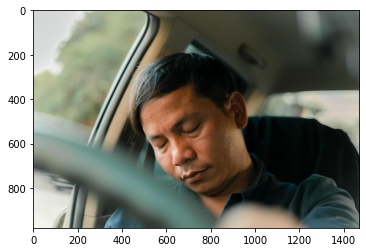

In [ ]:
plt.imshow(plt.imread("driver1.jpg"))
prediction = model1.predict([prepare("driver1.jpg")])
if (prediction[0][2]>0.24):
  print("Driver is sleeping ---- value "+ str(prediction[0][2]))
else:
  print("Drive is not sleeping")

1/1 [==============================] - 0s 104ms/step


0

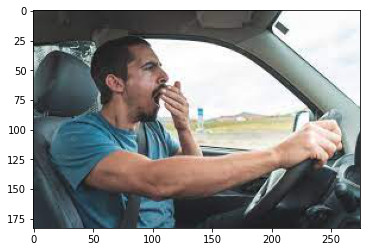

In [ ]:
plt.imshow(plt.imread("yawning.jpg"))
prediction = model1.predict([prepare("yawning.jpg")])
np.argmax(prediction)

In [ ]:
pip install ttf-opensans


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 599.8/599.8 KB 11.5 MB/s eta 0:00:00


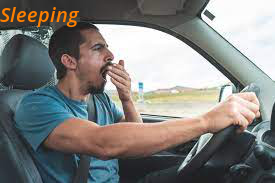

In [ ]:
from PIL import Image, ImageDraw, ImageFont
from ttf_opensans import opensans

my_font = opensans(font_weight=600, italic=True)
img = Image.open("yawning.jpg")
draw = ImageDraw.Draw(img)
imagefont = my_font.imagefont(size=20)
draw.text(font=imagefont, fill=(255, 128, 0), xy=(0, 0), text="Sleeping")
img

1/1 [==============================] - 0s 88ms/step


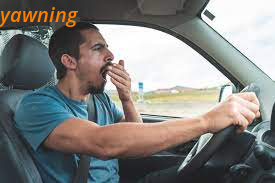

In [ ]:
prediction = model1.predict([prepare("yawning.jpg")])
text1=labels_new[int(str(np.argmax(prediction)))]

img = Image.open("yawning.jpg")
draw = ImageDraw.Draw(img)
imagefont = my_font.imagefont(size=20)
draw.text(font=imagefont, fill=(255, 128, 0), xy=(0, 0), text=text1)
img

1/1 [==============================] - 0s 295ms/step


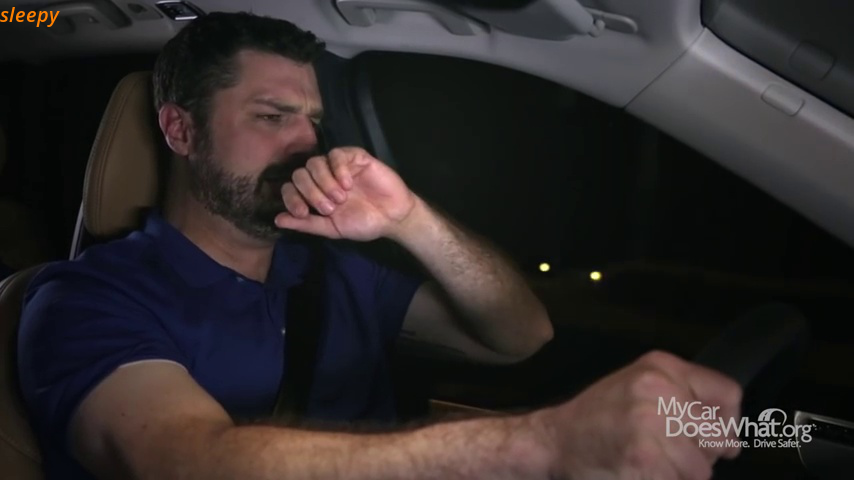

In [ ]:
prediction = model1.predict([prepare("Outputframes/014XIOR6TO.jpg")])
text1=labels_new[int(str(np.argmax(prediction)))]

img = Image.open("Outputframes/014XIOR6TO.jpg")
draw = ImageDraw.Draw(img)
imagefont = my_font.imagefont(size=20)
draw.text(font=imagefont, fill=(255, 128, 0), xy=(0, 0), text=text1)
img

In [ ]:
def PredictLabel(fname):
  prediction = model1.predict([prepare(fname)])
  text1=labels_new[int(str(np.argmax(prediction)))]
  img = Image.open(fname)
  draw = ImageDraw.Draw(img)
  imagefont = my_font.imagefont(size=20)
  draw.text(font=imagefont, fill=(255, 128, 0), xy=(0, 0), text=text1)
  return img

import string,random
def uniquename():
  res = ''.join(random.choices(string.ascii_uppercase +
                              string.digits, k=10))
  return res+".jpg"

In [ ]:
import cv2 
from google.colab.patches import cv2_imshow

vid_capture = cv2.VideoCapture("video.mp4")
# if (vid_capture.isOpened() == False):
#   print("Error opening the video file")
# # Read fps and frame count
# else:
#   fps = vid_capture.get(5)
#   print('Frames per second : ', fps,'FPS')

#   frame_count = vid_capture.get(7)
#   print('Frame count : ', frame_count)
 
frame_width = int(vid_capture.get(3))
frame_height = int(vid_capture.get(4))
size = (frame_width, frame_height)
result = cv2.VideoWriter('filename.mp4', 
                          cv2.VideoWriter_fourcc(*'MJPG'),
                          10, size) 

while(vid_capture.isOpened()):
  ret, frame = vid_capture.read()
  if ret == True:
    # cv2_imshow(frame)
    #save fname first
    name=uniquename()
    cv2.imwrite("frames/"+name,frame)
    #####
    
    fname=PredictLabel("frames/"+name)
    cv2.imwrite("Outputframes/"+name,np.asarray(fname))
    result.write(np.asarray(fname))
    key = cv2.waitKey(20)
    if key == ord('q'):
      break
  else:
    break
 
result.release()
vid_capture.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 89ms/step


**Make Video from frames**

In [ ]:
import cv2 
from google.colab.patches import cv2_imshow
from PIL import Image, ImageDraw, ImageFont

image_folder = 'drive/MyDrive/Driver_drowsiness_dataset/train/sleepy'
video_name = 'sleepy.mp4'

images = [img for img in os.listdir(image_folder) if img.endswith(".jpg")]
frame = cv2.imread(os.path.join(image_folder, images[0]))
height, width, layers = frame.shape

size = (width, height)
result = cv2.VideoWriter(video_name, 
                          cv2.VideoWriter_fourcc(*'MJPG'),
                          10, size) 

for image in images:
  img = Image.open(image_folder+"/"+image)
  result.write(np.asarray(img))

 
result.release()

cv2.destroyAllWindows()